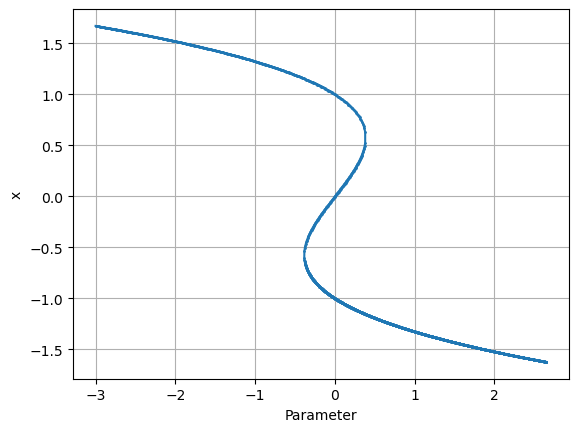

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np

import sys
sys.path.append("..") 

from SciComp.continuation import simple_continuation

func = lambda t, x, c: [t, x**3 - x + c]
x0 = 1
par0 = [-3]
vary_par = 0
step_size = 0.01
max_steps = 2000

x, par = simple_continuation(func, x0, par0, vary_par, step_size, max_steps, method='arc-length continuation')

plt.plot(par, x, '.-', markersize=2)
plt.xlabel('Parameter')
plt.ylabel('x')
plt.grid()
plt.show()

Initial guess =  [1.41 0.   6.28 2.  ]
condition1 =  -0.004213560154264329
condition2 =  -8.860732495820367e-09
condition1 =  -0.004213560154264329
condition2 =  -8.860732495820367e-09
condition1 =  -0.004213560154264329
condition2 =  -8.860732495820367e-09
condition1 =  -0.004213539143627099
condition2 =  -8.860735015506216e-09
condition1 =  -0.004213560154264329
condition2 =  6.026213019078602e-09
condition1 =  -0.004213560154264107
condition2 =  -8.86073245765645e-09
condition1 =  -0.004213570690976054
condition2 =  -8.860731755960805e-09
condition1 =  3.1386004906153175e-12
condition2 =  3.134982935523646e-10
condition1 =  0.0
condition2 =  -5.822753270757274e-12
sol =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 2.00000000e+00]
converged =  True


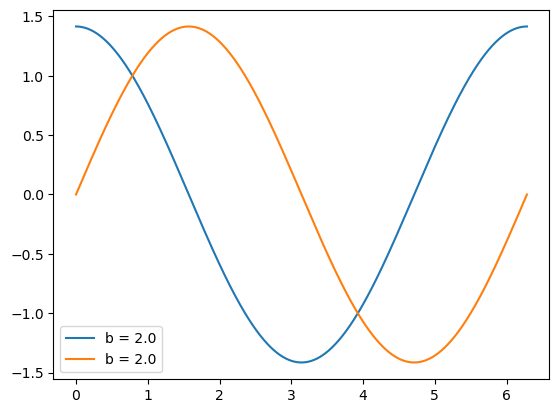

guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.95000000e+00]
tf must be greater than t0.
Solver failed to converge
guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.90000000e+00]
tf must be greater than t0.
Solver failed to converge
guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.85000000e+00]
tf must be greater than t0.
Solver failed to converge
guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.80000000e+00]
condition1 =  0.07257277533088602
condition2 =  3.0236574663657472e-09
condition1 =  0.07257277533088602
condition2 =  3.0236574663657472e-09
condition1 =  0.07257277533088602
condition2 =  3.0236574663657472e-09
condition1 =  0.07257279640431014
condition2 =  3.0247740714380405e-09
tf must be greater than t0.
Solver failed to converge
guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.75000000e+00]
tf must be greater than t0.
Solver failed to converge
guess =  [1.41421356e+00 9.05988650e-09 6.28318531e+00 1.70000000e+00]
tf must be greater t

In [3]:
from SciComp.ivp import shooting, solve_to

import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np

def ODE(t, y, beta, sigma):
    u1 = y[0]
    u2 = y[1]
    du1dt = beta*u1 - u2 + sigma*u1*(u1**2 + u2**2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1**2 + u2**2)
    return np.array([du1dt, du2dt])

def phase_function(t, y, beta, sigma):
    return ODE(t, y, beta, sigma)[0]


x0 = [1.41, 0]
T0 = 6.28
param_current = [2, -1]
variation_param = 0
param_step_size = -0.05
x_step_size = 0.00
max_steps = 10
tol = 1e-4

method = 'parameter continuation'
    # method = 'arc-length continuation'

num_vars = len(x0)
guess = np.array([])
    
# Coallate initial guesses
for i in range(num_vars):
    guess = np.append(guess, x0[i])
guess = np.append(guess, T0)
guess = np.append(guess, param_current[variation_param])
print('Initial guess = ', guess)

x_sol = []
par_sol = []
t0 = 0

step = 0
while step <= max_steps:

    def func(X0):
        X_next = X0[:-1]
        T_next = X0[-2]
        b_next = X0[-1]

        param_current[variation_param] = b_next
        X0, T = shooting(X_next, ODE, phase_function, function_args=param_current)
        
        t, y = solve_to(ODE, 0, X0, tf=T, method='RK4', args=param_current)

        # Check if start and end points are the same
        condition1 = X_next[0] - y[-1, 0] 
        print('condition1 = ', condition1)
        condition2 = X_next[1] - y[-1, 1]
        print('condition2 = ', condition2)

        # Check if Time Period is correct
        condition3 = T - T_next
        
        if method == 'arc-length continuation' and len(x_sol) >= 2:
            # Construct vector of X and b
            u_current = np.array([])
            for i in range(num_vars):
                u_current = np.append(u_current, X_current[i])
            u_current = np.append(u_current, param_current[variation_param])

            u_next = np.array([])
            for i in range(num_vars):
                u_next = np.append(u_next, X_next[i])
            u_next = np.append(u_next, b_next)

            u_delta = np.array([])
            for i in range(num_vars):
                u_delta = np.append(u_delta, delta_X[i])
            u_delta = np.append(u_delta, delta_param)

            # Calculate dot product
            condition4 = np.dot(u_current - u_next, u_delta)
        else:
            condition4 = b_next - param_current[variation_param]

        return np.array([condition1, condition2, condition3 , condition4])
    

    try:
        fs = fsolve(func, guess, full_output=True)

        # Extract the solution and check if the solver converged
        sol = fs[0]
        X_current = sol[:-2]
        T_current = sol[-2]
        param_current[variation_param] = sol[-1]
        converged = fs[2] == 1

        print('sol = ', sol)
        print('converged = ', converged)
    # Except print error message
    except Exception as e:
        print(e)
        converged = False
        print('Solver failed to converge')


    if converged:
        x_sol.append(X_current)
        par_sol.append(param_current[variation_param])

        t, y = solve_to(ODE, 0, X_current, tf=T_current, method='RK4', args=param_current)
        plt.plot(t, y, label='b = ' + str(param_current[variation_param]))
        plt.legend()
        plt.show()


    # Update the initial guess for the next step based on previous two solutions
    if len(x_sol) >= 5:
        # Find delta
        delta_param = param_current[variation_param] - param_previous

        # Update b_i and b_i-1
        param_previous = param_current[variation_param]
        param_current[variation_param] += delta_param

        delta_X = X_current - X_previous
        X_previous = X_current
        X_current += delta_X - x_step_size


    # Update next step from arbitrary step size
    else:
        X_previous = X_current
        X_current -= x_step_size

        param_previous = param_current[variation_param]
        param_current[variation_param] += param_step_size


    num_vars = len(X_current)
    guess = np.array([])
        
    # Coallate initial guesses
    for i in range(num_vars):
        guess = np.append(guess, X_current[i])
    guess = np.append(guess, T_current)
    guess = np.append(guess, param_current[variation_param])
    print('guess = ', guess)

    step += 1




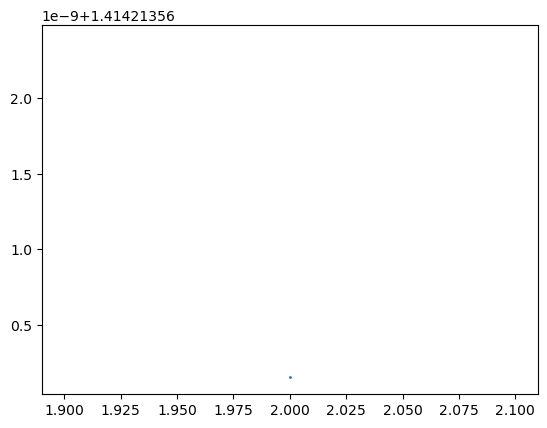

In [4]:
# Calculate the magnitude of the solutions
mag = []
for i in range(len(x_sol)):
    mag.append(np.sqrt(x_sol[i][0]**2 + x_sol[i][1]**2))

plt.plot(par_sol, mag, '.-', label='scipy.optimize.fsolve', markersize=2)

# Plot the sqrt of the parameter
plt.plot(par_sol, np.sqrt(par_sol), label='sqrt(b)')